In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')


Modules are imported.


In [14]:
df = pd.read_csv('covid_vaccine_statewise.csv')

In [15]:
print(df.head())
print("\nData Summary:\n", df.info())

   Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3   

In [16]:
df['Updated On'] = pd.to_datetime(df['Updated On'])

C:\Users\Ankit\AppData\Local\Temp\ipykernel_21112\332112271.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Updated On'] = pd.to_datetime(df['Updated On'])


In [ ]:
df = df[df['State'] != 'India']

In [ ]:

latest = df.sort_values('Updated On').drop_duplicates('State', keep='last')
top_states = latest[['State', 'Total Doses Administered']].sort_values(by='Total Doses Administered', ascending=False).head(5)


In [18]:
print("\nTop 5 States by Total Vaccination:\n", top_states)


Top 5 States by Total Vaccination:
             State  Total Doses Administered
5088    Meghalaya                       NaN
2756      Haryana                       NaN
4876      Manipur                       NaN
7632  Uttarakhand                       NaN
4664  Maharashtra                       NaN


C:\Users\Ankit\AppData\Local\Temp\ipykernel_21112\4091509231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='Total Doses Administered', palette='Blues_d')


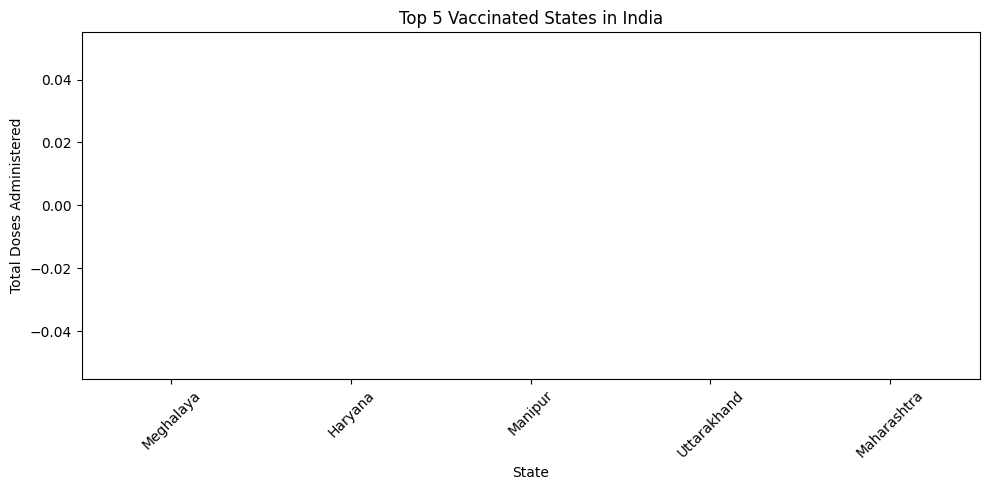

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_states, x='State', y='Total Doses Administered', palette='Blues_d')
plt.title('Top 5 Vaccinated States in India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
gender_cols = ['Male(Individuals Vaccinated)', 'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)']
gender_vaccine = latest[['State'] + gender_cols].set_index('State').sum()

print("\nTotal Vaccinations by Gender:\n", gender_vaccine)



Total Vaccinations by Gender:
 Male(Individuals Vaccinated)           0.0
Female(Individuals Vaccinated)         0.0
Transgender(Individuals Vaccinated)    0.0
dtype: float64


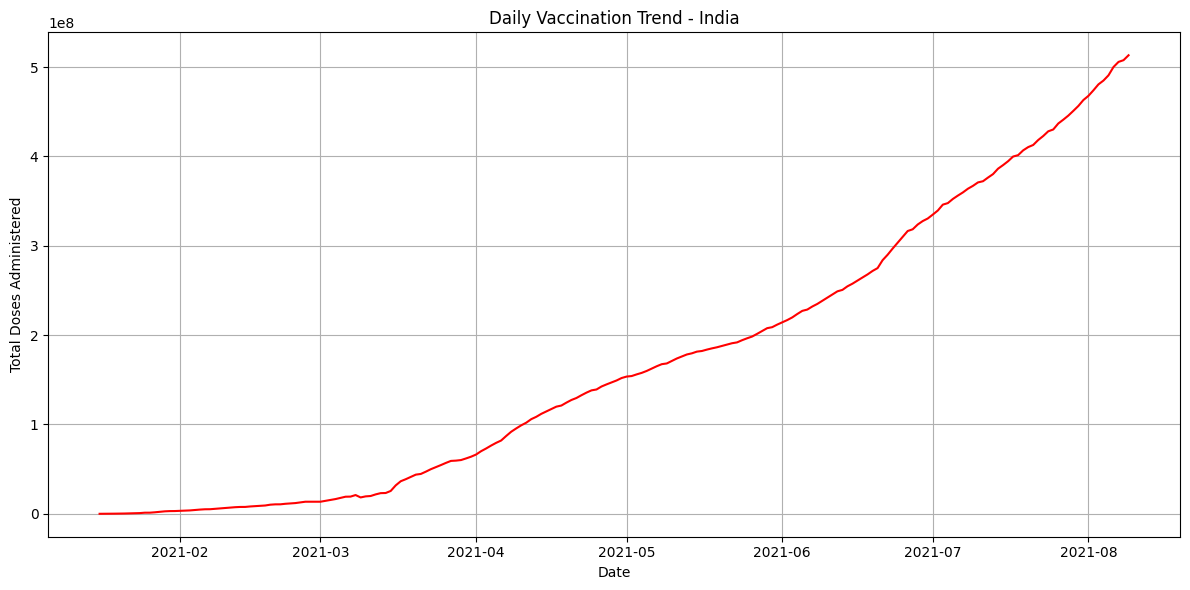

In [37]:
india_df = pd.read_csv('covid_vaccine_statewise.csv')
india_df = india_df[india_df['State'] == 'India']
india_df['Updated On'] = pd.to_datetime(india_df['Updated On'], dayfirst=True)

plt.figure(figsize=(12,6))
plt.plot(india_df['Updated On'], india_df['Total Doses Administered'], color='red')
plt.title("Daily Vaccination Trend - India")
plt.xlabel("Date")
plt.ylabel("Total Doses Administered")
plt.grid(True)
plt.tight_layout()
plt.show()

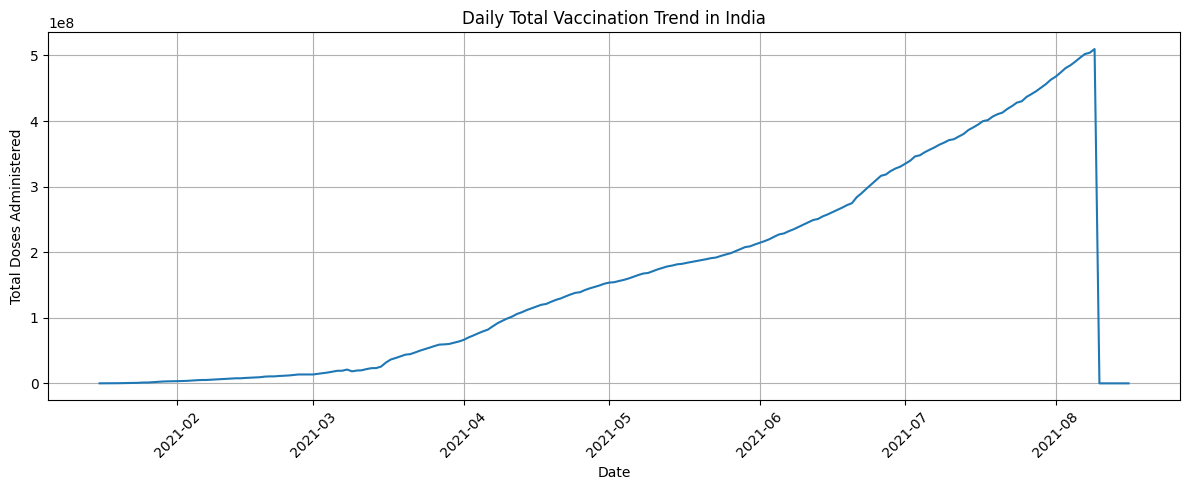

In [45]:
daily_total = df[df['State'] != 'India'].groupby('Updated On')['Total Doses Administered'].sum().reset_index()

# Line Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_total, x='Updated On', y='Total Doses Administered')
plt.title('Daily Total Vaccination Trend in India')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
latest['Total Doses Administered'] = latest['Total Doses Administered'].astype(str).str.replace(',', '')
latest['Total Doses Administered'] = pd.to_numeric(latest['Total Doses Administered'], errors='coerce').fillna(0)

latest['Total Individuals Vaccinated'] = pd.to_numeric(latest['Total Individuals Vaccinated'], errors='coerce').fillna(0)




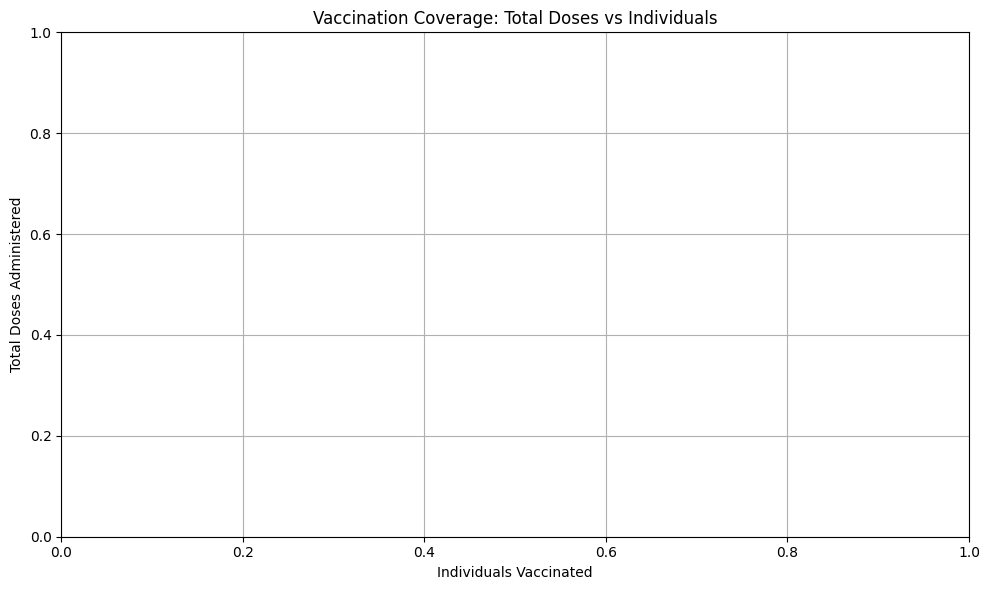

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest, x='Total Individuals Vaccinated', y='Total Doses Administered', hue='State', legend=False, s=100)
plt.title('Vaccination Coverage: Total Doses vs Individuals')
plt.xlabel('Individuals Vaccinated')
plt.ylabel('Total Doses Administered')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
maha = df[df['State'] == 'Maharashtra']
maha['Updated On'] = pd.to_datetime(maha['Updated On'])
maha['Total Doses Administered'] = maha['Total Doses Administered'].astype(str).str.replace(',', '')
maha['Total Doses Administered'] = pd.to_numeric(maha['Total Doses Administered'], errors='coerce').fillna(0)


C:\Users\Ankit\AppData\Local\Temp\ipykernel_21112\3630596772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['Updated On'] = pd.to_datetime(maha['Updated On'])
C:\Users\Ankit\AppData\Local\Temp\ipykernel_21112\3630596772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['Total Doses Administered'] = maha['Total Doses Administered'].astype(str).str.replace(',', '')
C:\Users\Ankit\AppData\Local\Temp\ipykernel_21112\3630596772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

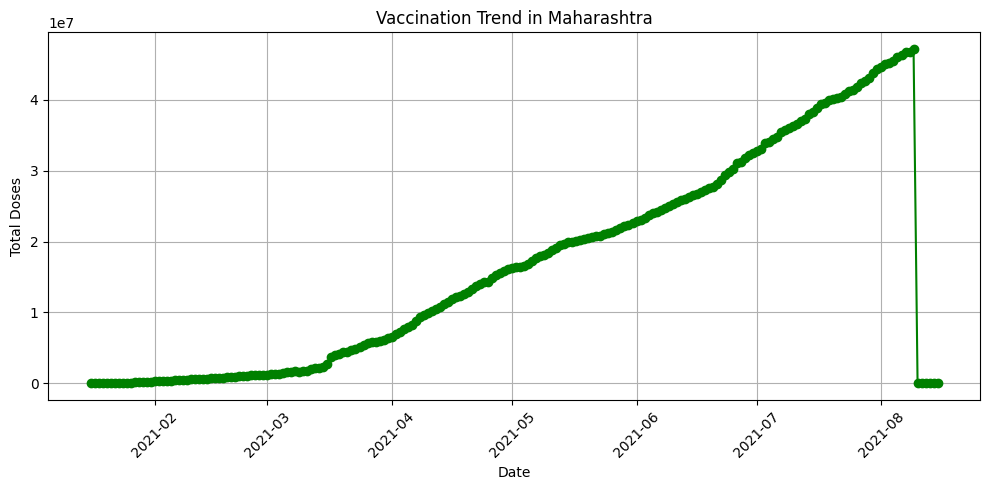

In [54]:
plt.figure(figsize=(10,5))
plt.plot(maha['Updated On'], maha['Total Doses Administered'], color='green', marker='o')
plt.title('Vaccination Trend in Maharashtra')
plt.xlabel('Date')
plt.ylabel('Total Doses')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

SyntaxError: invalid character '🎯' (U+1F3AF) (3481397711.py, line 8)

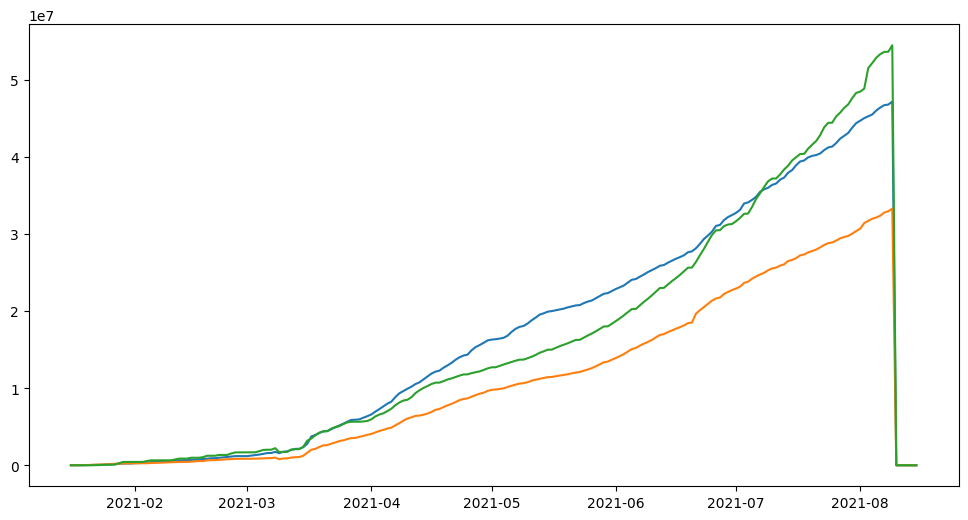

In [55]:
states = ['Maharashtra', 'Karnataka', 'Uttar Pradesh']

plt.figure(figsize=(12, 6))
for state in states:
    data = df[df['State'] == state].copy()
    data['Updated On'] = pd.to_datetime(data['Updated On'])
    data['Total Doses Administered'] = data['Total Doses Administered'].astype(str).str.replace(',', '')
    data['Total Doses Administered'] = pd.to_numeric(data['Total Doses Administered'], errors='coerce').fillna(0)
    plt.plot(data['Updated On'], data['Total Doses Administered'], label=state)

In [22]:
daily_df = df[df['State'] == 'Andaman and Nicobar Islands']  # Use any state to see trend
daily_df = daily_df.sort_values('Updated On')
daily_df = daily_df[['Updated On', 'Total Doses Administered']].dropna()


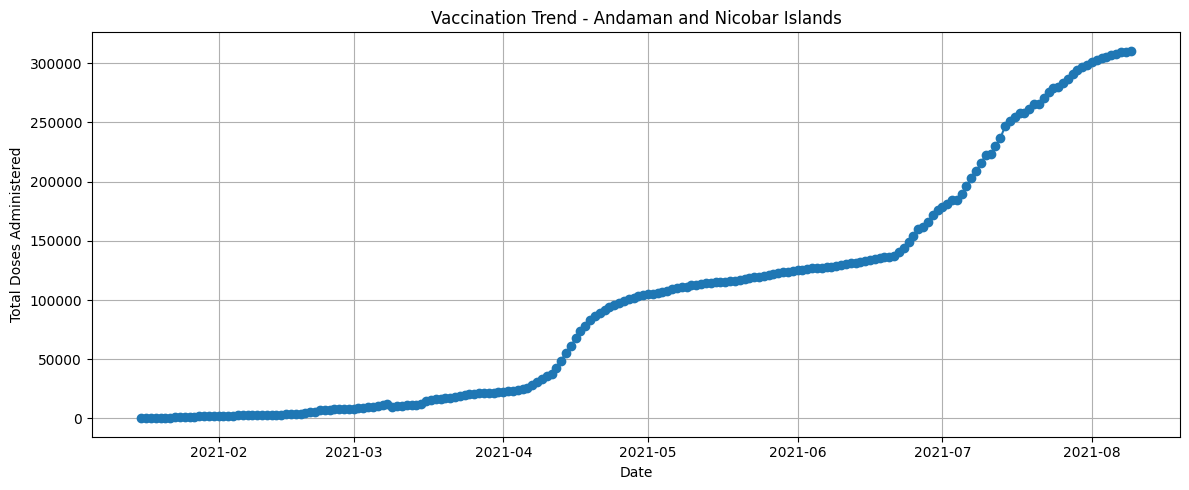

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(daily_df['Updated On'], daily_df['Total Doses Administered'], marker='o')
plt.title('Vaccination Trend - Andaman and Nicobar Islands')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.grid(True)
plt.tight_layout()
plt.show()